perform data cleaning and exploratory data analysis (EDA) on a titanic dataset from kaggle. explore the relationships between variable and identify patterns and trends in the data

Importing Necessary Libraries

In [71]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb 

In [72]:
data=pd.read_csv("./titanic/titanic.csv")
test_data=pd.read_csv("./titanic/test.csv")
train_data=pd.read_csv("./titanic/train.csv")

Data Cleaning

In [73]:
data.head()


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [74]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [75]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [76]:
data.isnull().sum()

PassengerId    0
Survived       0
dtype: int64

In [77]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [78]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

* We see that there are totally 1014 missing values in the column named cabin in both train and test dataset 

Dropping the column named 'cabin' from both train abd test dataset

In [79]:
del test_data['Cabin']

In [80]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [81]:
test_data.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

In [82]:
del train_data['Cabin']

In [83]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [84]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

* Filling the missing values in the 'Age' column with the mean and assign it back to the DataFrame

In [85]:
test_data['Age'].fillna(test_data['Age'].mean(), inplace=True)
print(test_data['Age'])

0      34.50000
1      47.00000
2      62.00000
3      27.00000
4      22.00000
         ...   
413    30.27259
414    39.00000
415    38.50000
416    30.27259
417    30.27259
Name: Age, Length: 418, dtype: float64


In [86]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

* Filling the missing values in the 'Age' column with the mean and assign it back to the DataFrame

In [87]:
train_data['Age'].fillna(train_data['Age'].mean(), inplace=True)
print(train_data['Age'])

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64


In [88]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

UNIVARIATE ANALYSIS

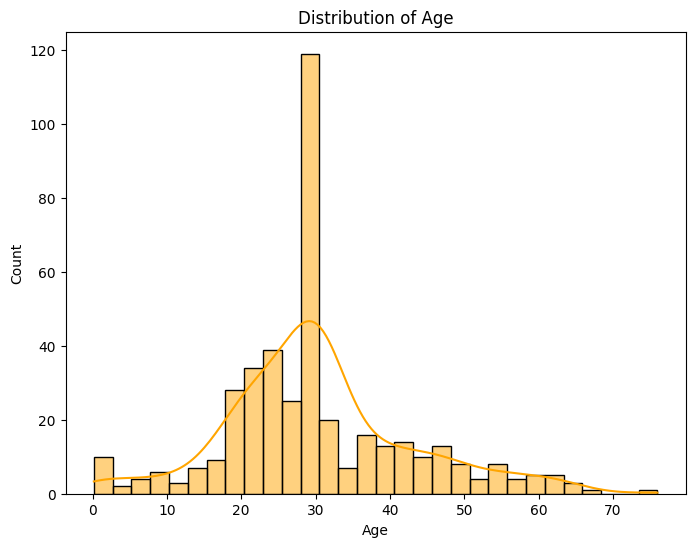

In [107]:
plt.figure(figsize=(8, 6))
sb.histplot(test_data['Age'], bins=30, kde=True, color= 'orange')
plt.title('Distribution of Age')
plt.show()

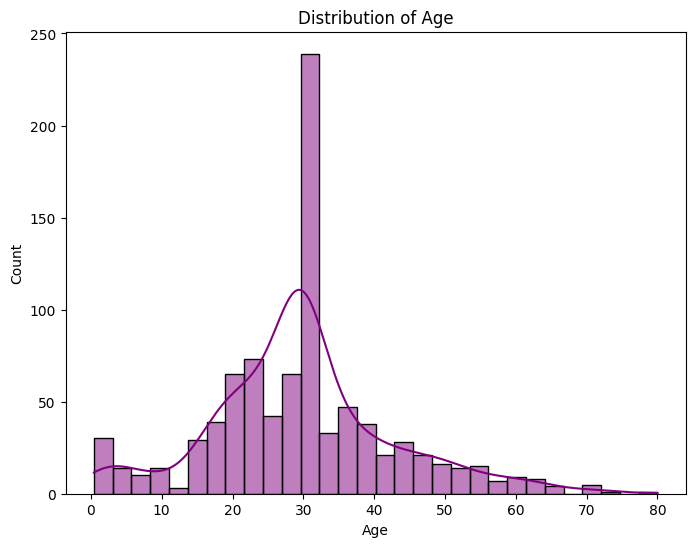

In [106]:

plt.figure(figsize=(8, 6))
sb.histplot(train_data['Age'], bins=30, kde=True, color='purple')
plt.title('Distribution of Age')
plt.show()

BIVARIATE ANALYSIS

Survival Rate

In [91]:
data['Survived'].value_counts(normalize=True)

Survived
0    0.636364
1    0.363636
Name: proportion, dtype: float64

Here,
* 0 - death proportion
* 1 - survival proportion

Exploring the relationship between 'Pclass' and 'Survived'

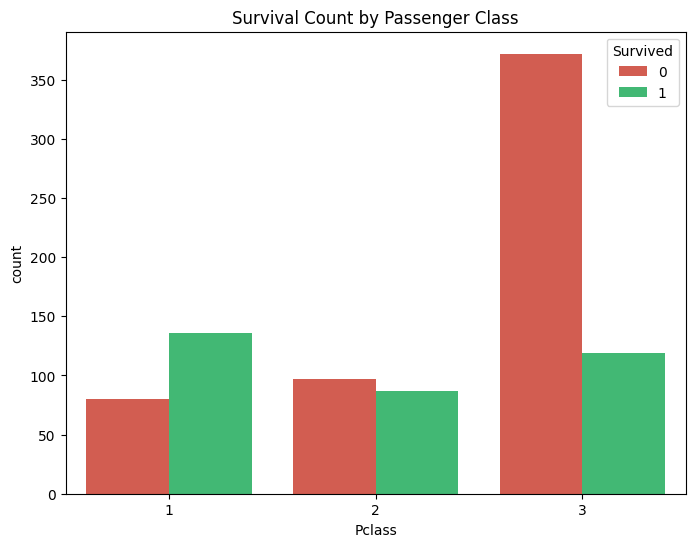

In [110]:
custom_palette = sb.color_palette(['#e74c3c', '#2ecc71'])

plt.figure(figsize=(8, 6))
sb.countplot(x='Pclass', hue='Survived', data=train_data, palette=custom_palette)
plt.title('Survival Count by Passenger Class')
plt.show()


CORRELATION ANALYSIS

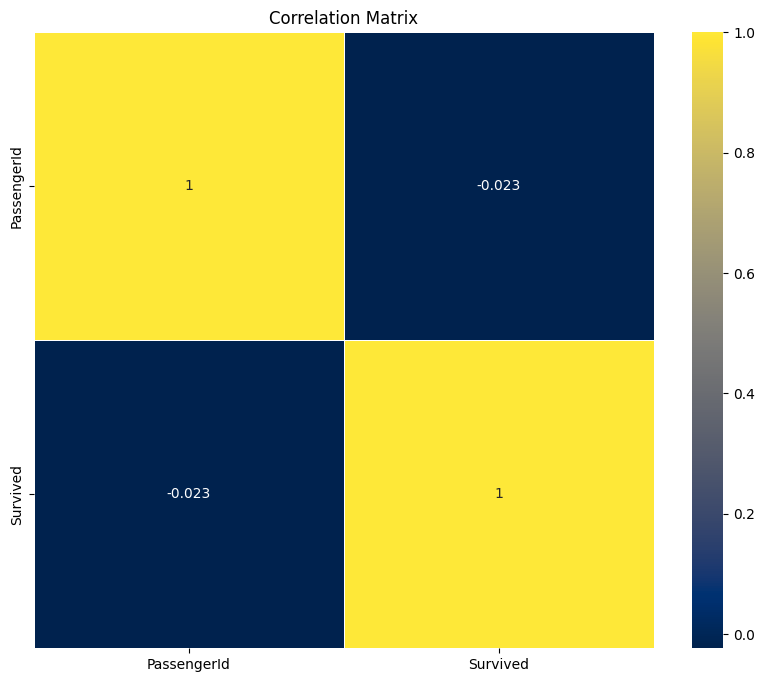

In [117]:
#Correlation of Passengerid and Survived
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sb.heatmap(correlation_matrix, annot=True, cmap='cividis', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()
